In [ ]:
import robosandbox as rsb
import numpy as np

# How to add new robot indice in RoboSandbox (rsb)?


## Define the indice
For example, we want to add order independent manipulability: Kim and Khosla [70] solved the problem of dimensional dependency of the manipulability index by taking the geometric mean of the manipulability index ($\mu$). The dimension independent manipulability ($\mu_{O}$) for n-link manipulator is given as: 
$$
\mu_O=\sqrt[n]{\mu}=\sqrt[n]{\operatorname{det}\left(J \cdot J^T\right)}
$$


In [2]:
def order_independent_manipulability(
    workspace, joint_points, method="order_independent_manipulability", axes="all"
):
    """
    \sqrt[n]{(\operatorname{det}(\mathbf{H}(\mathbf{q}))}
    Calculate the order-independent manipulability index for a robot.

    :param workspace: The workspace instance providing access to the robot.
    :param joint_points: List of joint configurations to evaluate.
    :param method: The method name (for compatibility with the indice registry).
    :param axes: Which axes to consider ('all', 'trans', 'rot').
    :return: The order-independent manipulability indices for each configuration.
    """
    results = []

    for point in joint_points:
        J = workspace.robot.jacob0(point)
        H = J @ J.T

        # Get the determinant of the manipulability matrix
        det_H = np.linalg.det(H)

        # Calculate the nth root of the determinant (n is the matrix dimension)
        n = workspace.robot.dofs
        if det_H > 0:
            order_independent_manip = det_H ** (1 / n)
        else:
            order_independent_manip = 0

        results.append(order_independent_manip)

    return np.array(results)

## Calculate the indice

Steps to calculate the indice:
1. define the robot, such as `robot = rsb.models.DH.Panda()`
2. define the workspace `ws = WorkSpace(robot)`
3. register the new index `ws.add_indice(...)`
4. calculate the global indice `G = ws.global_indice(...)`

In [5]:
robot = rsb.models.DH.Panda()
ws = rsb.performance.workspace.WorkSpace(robot)

# Register the new manipulability index
ws.add_indice(
    method="order_independent_manipulability",
    function=order_independent_manipulability,
    description="Order-independent manipulability index (nth root of determinant)",
)

# Calculate the global indices
print("\nCalculating global indices (this may take a moment)...")
global_oim = ws.global_indice(method="order_independent_manipulability")
print(f"Global order-independent manipulability: {global_oim:.4f}")


Calculating global indices (this may take a moment)...
Global order-independent manipulability: 0.3603


## Visualize the workspace 

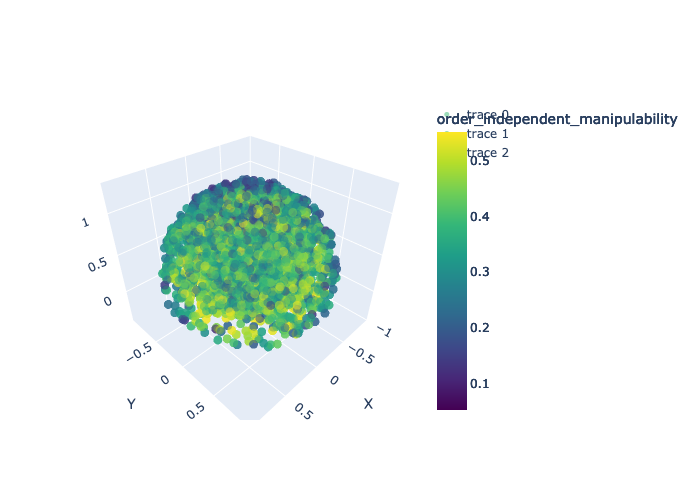

In [9]:
fig = ws.plot(color="order_independent_manipulability")
fig.show("png") # display the plot in PNG format for better visibility on github
